## Paso 1: Instalar las dependencias y la configuración del notebook en GPU

In [ ]:
#!pip install tensorflow-gpu==2.5.0

## Paso 2: Importar las librerías necesarias

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

2022-03-05 20:30:39.264495: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


'2.5.0'

In [3]:
display(type(cifar10.load_data()))
display(len(cifar10.load_data()[0][0]))
#(cifar10.load_data()[0])

tuple

50000

## Paso 3: Pre procesado de datos


### Cargar el dataset  Cifar10

In [4]:
# Configurar el nombre de las clases del dataset
class_names = ['avión', 'coche', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

### Cargar el dataset de la forma:
$$
F(f_{1}(X_{train}, Y_{train}) ,f_{2}(X_{test}, Y_{test})) = [a,b,c,d]=[5000,32,32,3] \\ 
$$
$a$ es el número de imágenes, $(b,c,d)$ es la dimension espacial 


In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### Normalización de las imágenes

In [6]:
X_train = X_train / 255.0

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test = X_test / 255.0

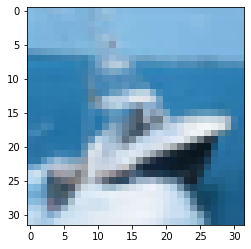

In [9]:
#plt.imshow(X_test[10])
plt.imshow(cifar10.load_data()[0][0][8])

In [10]:
y_train[8]

array([8], dtype=uint8)

## Paso 4: Construir una red neuronal convolucional

### Definir el modelo

In [11]:
#tf.keras.Model?

In [12]:
model = tf.keras.models.Sequential()

2022-03-05 20:30:41.844777: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-05 20:30:41.903270: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-05 20:30:41.903637: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:09:00.0 name: NVIDIA GeForce RTX 3070 computeCapability: 8.6
coreClock: 1.725GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-03-05 20:30:41.903654: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-03-05 20:30:41.906478: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-03-05 20:30:41.906508: I tensorflow/stream_executor/pla

### Añadir la primera capa de convolución

Hyper parámetros de la capa de la RNC:
- Filtros: 128
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu
- input_shape: (32, 32, 3)


In [13]:
model.add(tf.keras.layers.Conv2D(filters=128, 
                                 kernel_size=3, 
                                 padding="same", 
                                 activation="relu", 
                                 kernel_initializer='glorot_uniform',
                                 input_shape=[32, 32, 3]))

### Añadir una segunda capa convolucional y la capa de max-pooling 

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

Hyper parámetros de la capa de MaxPool:
- pool_size: 2
- strides: 2
- padding: valid

In [14]:
model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=4,
                                 padding="same", 
                                 activation="relu"
                                ))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                    strides=2, 
                                    padding='valid'))

### Añadir la tercera y cuarta capa convolucional

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu
- Kernel: glorot_uniform

Hyper parámetros de la capa de la MaxPool:
- pool_size: 2
- strides: 2
- padding: valid


In [15]:
model.add(tf.keras.layers.Conv2D(filters=64,
                                 kernel_size=3,
                                 padding="same", 
                                 activation="relu",
                                 kernel_initializer='glorot_uniform'
                                ))
model.add(tf.keras.layers.Conv2D(filters=64, 
                                 kernel_size=3, 
                                 padding="same", 
                                 activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                    strides=2, 
                                    padding='valid'))

###  Añadir la cuarta capa convolucional y la capa de max-pooling

Hyper parámetros de la capa de la RNC:
- Filtros: 64
- Tamaño del kernel: 3
- padding: same
- Función de Activación: relu

Hyper parámetros de la capa de la MaxPool:
- pool_size: 2
- strides: 2
- padding: valid


In [17]:
model.add(tf.keras.layers.Conv2D(filters=64,
                                 kernel_size=3, 
                                 padding="same", 
                                 activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                    strides=2, 
                                    padding='valid'))

### Añadir la capa de flattening

In [19]:
model.add(tf.keras.layers.Flatten())

### Añadir la primera capa fully-connected

Hyper parámetros de la capa totalmente conectada:
- units/neurons: 256
- activation: relu

In [20]:
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.2))

### Añadir la capa de salida

Hyper parámetros de la capa totalmente conectada:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [21]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        131136    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          3

### Compilar el modelo

#### sparse_categorical_accuracy
sparse_categorical_accuracy comprueba si el valor verdadero maximal coincide con el índice maximal del valor de la predicción.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [23]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="Adam", 
              metrics=["sparse_categorical_accuracy"])

### Entrenar el modelo

In [24]:
X_train.shape

(50000, 32, 32, 3)

In [25]:
model.fit(X_train, y_train, epochs=500, batch_size=100)

2022-03-05 20:30:42.979980: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-05 20:30:42.997302: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3800095000 Hz


Epoch 1/500


2022-03-05 20:30:43.307130: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-03-05 20:30:43.880858: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8204
2022-03-05 20:30:44.733221: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-03-05 20:30:45.234296: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-03-05 20:30:45.377880: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


500/500 [==============================] - 9s 12ms/step - loss: 1.5303 - sparse_categorical_accuracy: 0.4445
Epoch 2/500
500/500 [==============================] - 6s 12ms/step - loss: 1.0436 - sparse_categorical_accuracy: 0.6306
Epoch 3/500
500/500 [==============================] - 6s 12ms/step - loss: 0.8248 - sparse_categorical_accuracy: 0.7117
Epoch 4/500
500/500 [==============================] - 6s 12ms/step - loss: 0.6853 - sparse_categorical_accuracy: 0.7599
Epoch 5/500
500/500 [==============================] - 6s 12ms/step - loss: 0.5913 - sparse_categorical_accuracy: 0.7949
Epoch 6/500
500/500 [==============================] - 6s 12ms/step - loss: 0.5062 - sparse_categorical_accuracy: 0.8235
Epoch 7/500
500/500 [==============================] - 6s 12ms/step - loss: 0.4313 - sparse_categorical_accuracy: 0.8494
Epoch 8/500
500/500 [==============================] - 6s 12ms/step - loss: 0.3590 - sparse_categorical_accuracy: 0.8735
Epoch 9/500
500/500 [=======================

### Evaluar el modelo

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 18.1040 - sparse_categorical_accuracy: 0.7448


In [27]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7447999715805054
